In [1]:
import crispr_assembler as ca
import matplotlib.pyplot as plt

import numpy as np
import os
import editdistance as ed

In [2]:
path = "../data/heatmap/"
files = sorted(os.listdir(path))

In [3]:
files

['CDiP210_WGSspacers.fasta',
 'CDiP211_WGSspacers.fasta',
 'CDiP221_WGSspacers.fasta',
 'CDiP648_WGSspacers.fasta',
 'CDiP77_WGSspacers.fasta',
 'CDiP79_WGSspacers.fasta',
 'clust210.fasta',
 'clust211.fasta',
 'clust221.fasta',
 'clust648.fasta',
 'clust77.fasta',
 'clust79.fasta']

In [4]:
all_spacers = []
for f in files:
    spacers = []
    with open(path + f) as file:
        spacers = [x[:-2] for x in file.readlines()[1::2]]
    all_spacers.append(spacers)

In [5]:
[len(x) for x in all_spacers]

[168, 107, 105, 162, 80, 100, 145, 86, 101, 121, 84, 98]

In [7]:
def calc_dist(sp1, sp2):
    common = []
    matrix = np.zeros((len(sp1), len(sp2)))
    
    common = 0
    for i, s1 in enumerate(sp1):
        for j, s2 in enumerate(sp2):
            if ed.eval(s1,s2) < 6:
                common += 1
            
    ec = ca.ErrorCorrector(5)
    ec.fit(sp1 + sp2)
    
            
    return common / len(ec.cluster_to_index) #(matrix < 2).sum()/ (len(sp1) + len(sp2) - (matrix < 2).sum()), matrix < 2

In [95]:
calc_dist(all_spacers[0], all_spacers[6])

100%|██████████| 311/311 [00:00<00:00, 2183.37it/s]


0.13818181818181818

In [89]:
matrix

275

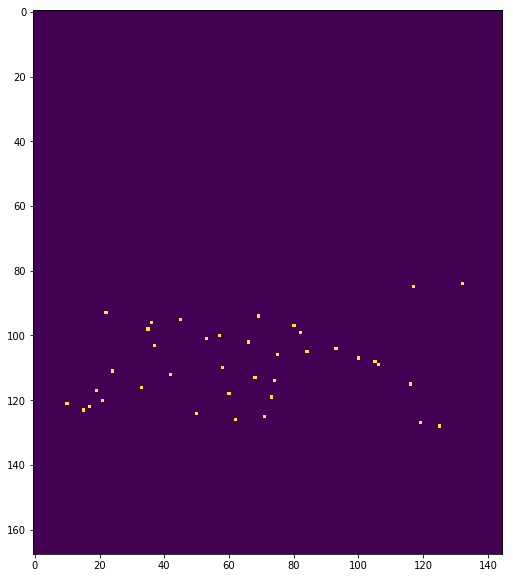

In [84]:
plt.figure(figsize = (10, 10))
plt.imshow(matrix)

In [85]:
matrix.sum(1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [90]:
files

['CDiP210_WGSspacers.fasta',
 'CDiP211_WGSspacers.fasta',
 'CDiP221_WGSspacers.fasta',
 'CDiP648_WGSspacers.fasta',
 'CDiP77_WGSspacers.fasta',
 'CDiP79_WGSspacers.fasta',
 'clust210.fasta',
 'clust211.fasta',
 'clust221.fasta',
 'clust648.fasta',
 'clust77.fasta',
 'clust79.fasta']

In [62]:
calc_dist(all_spacers[0], all_spacers[6])

(0.13818181818181818, array([[21., 27., 24., ..., 24., 23., 21.],
        [22., 24., 23., ..., 23., 20., 23.],
        [20., 23., 24., ..., 24., 20., 20.],
        ...,
        [24., 21., 20., ..., 21., 21., 23.],
        [25., 16., 22., ..., 21., 19., 17.],
        [21., 19., 18., ..., 21., 20., 20.]]))

In [70]:
[x[:2] for x in all_spacers]

[['CTCTTCTGTTTGCTTATTTACATACTGTAGAGCCATATAA',
  'TTTTTCTGTCTGTTCATTTACATAATACAATGCAAAGTCA'],
 ['TCAATTAAATTATGACCTTGGTTTAGATAGTTCAT',
  'CAGAAGGAATATCTGGAGTTATTGGAGGGTCTATTG'],
 ['CTCCTTTCATTTCTCCTTTAGCTTCATAGCTTATTT',
  'CTTTTTCCGAAAAACCATTACTTACAAAATCTACA'],
 ['ACATATAAAGCTCTTAAGTATATAACAAATCAAAATGAGG',
  'AACTACAGAGCTTTGTACTACATAAATAATAAGACAGAAA'],
 ['ATTTTTGACGCTATGAAGAAATTTACTACAAAATTT',
  'ACTTTTTTCATCCTCCCAAACCTCTTGTTCGCTGTC'],
 ['ACAATTATTAATTGTTTTATTAGTGAAATCACAGC',
  'ATATAAAATGGGATTAGTAAAAAACACAACAGGAA'],
 ['TCAGCATATTCTTCTAGTTCTCCAGCGTCCAGTTT', 'GGGAGCGCAAGCAGGGCTAAATCAAAATGACGAC'],
 ['GACTCTGCCATCCCTGTAACGAACAGCCTTACAGC',
  'ACTTATCTGTAACCCTTATATGTTCAAATTCATAGC'],
 ['TCACACATGAGCAATATCGAAACAGGCAAATCTAC', 'TGGTATATCATACTCGTGCATTGCCTGCTCCACA'],
 ['GAAGTCAACAATTTGGCTATTGGTTAAGTACAACTA',
  'GAGTATCAAGAGACCAGGGAAAGGCAGGTAAAGC'],
 ['GATTGTACTTTAGCGTCTGCACTAGCTTTGTCTA', 'AGTACATATAATGAGTCTTTAACATCAGTTATGAA'],
 ['CAAAGTGCTAGGTCACTAAATGATGCAACAGTAGA',
  'TCACACATGAGCAATATCGAAACAGGC

In [8]:
res_mat = np.zeros((12,12))

for i in range(12):
    for j in range(12):
        res_mat[i, j] = calc_dist(all_spacers[i], all_spacers[j]) 

100%|██████████| 98/98 [00:00<00:00, 6456.12it/s]


In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

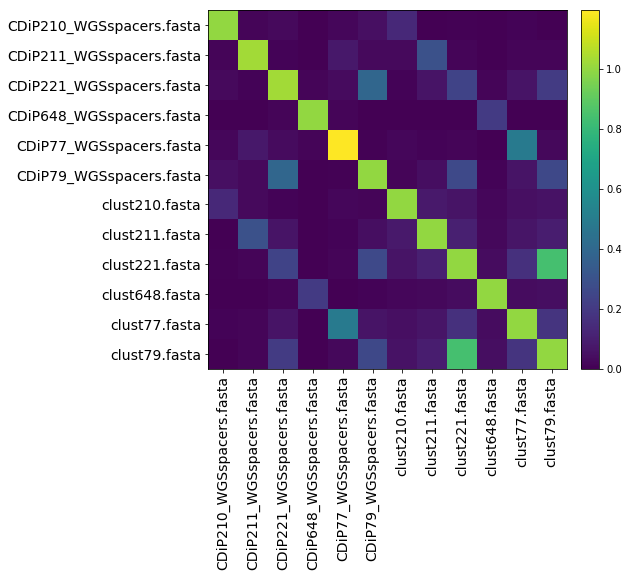

In [11]:
f, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(res_mat)# - np.diag(np.diag(res_mat)))
plt.xticks(np.arange(12), files, fontsize=14, rotation =90)#, prop={'family': 'monospace'})
plt.yticks(np.arange(12), files, fontsize=14)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cax.tick_params(labelsize=10)
plt.colorbar(im, cax=cax)

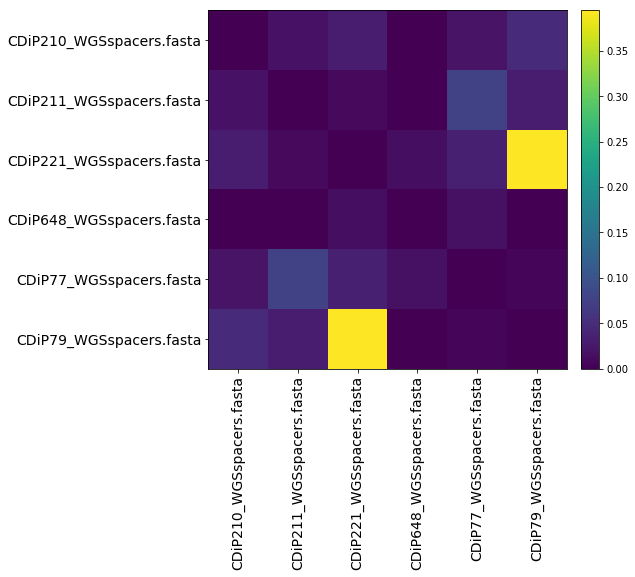

In [15]:
s, e = 0, 6
f, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(res_mat[s:e, s:e] - np.diag(np.diag(res_mat[s:e, s:e])))


plt.xticks(np.arange(s,e ), files[s:e], fontsize=14, rotation =90)#, prop={'family': 'monospace'})
plt.yticks(np.arange(s,e), files[s:e], fontsize=14)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cax.tick_params(labelsize=10)
plt.colorbar(im, cax=cax)

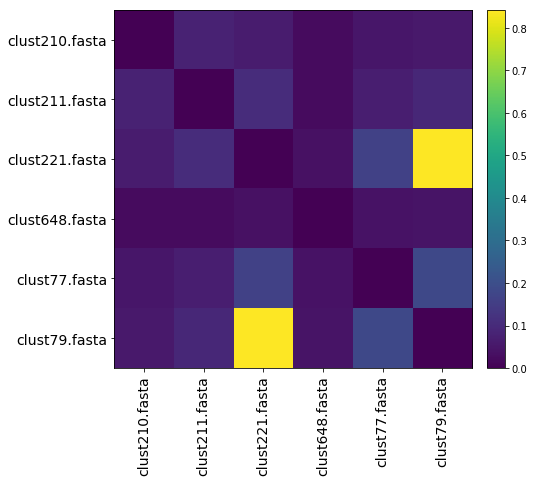

In [16]:
s, e = 6, 12
f, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(res_mat[s:e, s:e] - np.diag(np.diag(res_mat[s:e, s:e])))


plt.xticks(np.arange(e- s), files[s:e], fontsize=14, rotation =90)#, prop={'family': 'monospace'})
plt.yticks(np.arange(e- s), files[s:e], fontsize=14)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cax.tick_params(labelsize=10)
plt.colorbar(im, cax=cax)